In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.ion()
plt.rcParams['xtick.labelsize']=65
plt.rcParams['ytick.labelsize']=65
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update({'figure.autolayout': False})
plt.rcParams['figure.figsize'] = 21, 15
plt.rcParams['axes.linewidth'] = 5
plt.rcParams['font.family'] = 'Arial'

-8.81
33.8936184932646


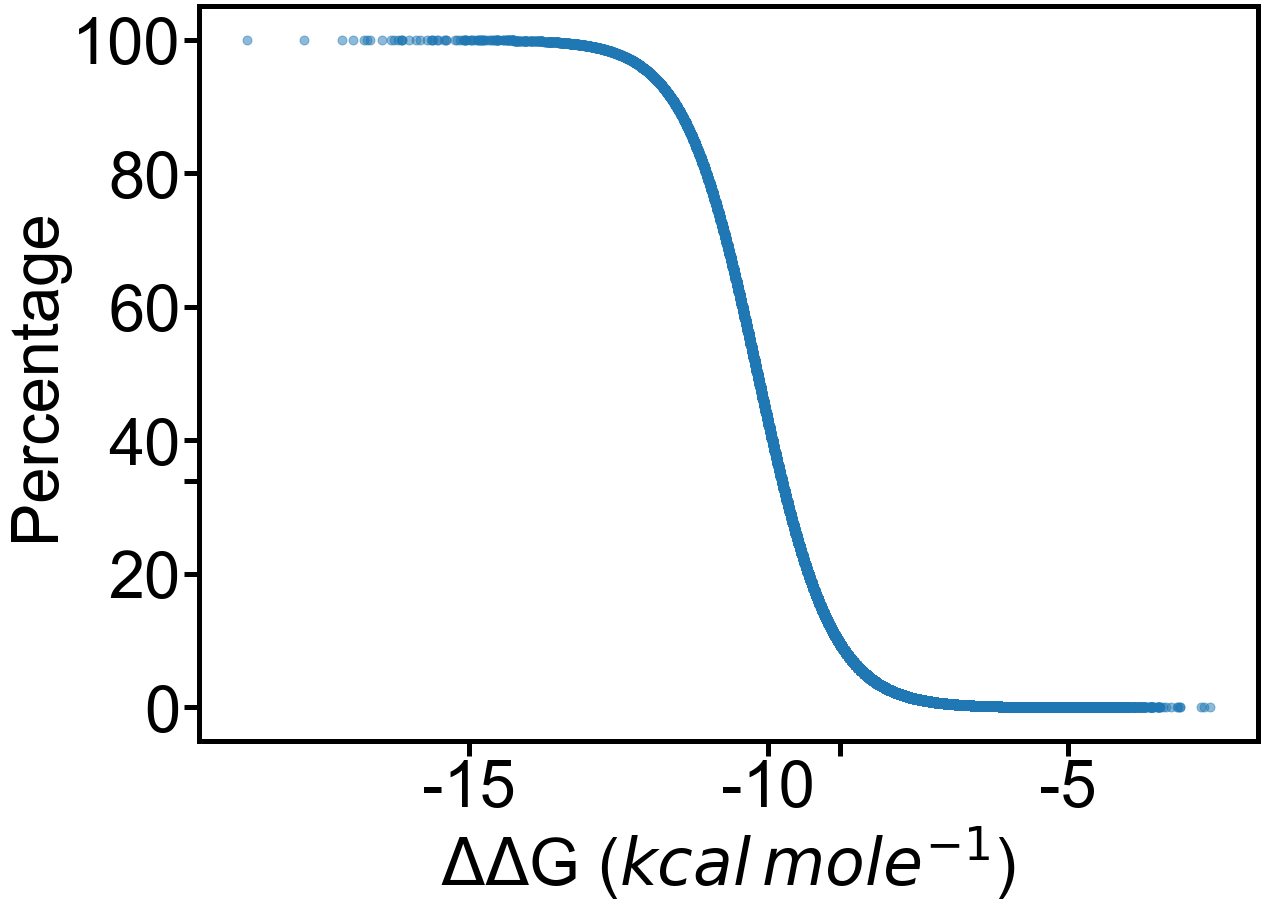

In [4]:
Complex_ddGs = []
Concentrations = []

with open("Complex_ddG25.txt", "r") as file:
    for line in file:
        Complex_ddGs.append(float(line.rstrip()))

with open("Concentrations25.txt", "r") as file:
    for line in file:
        Concentrations.append(float(line.rstrip())/2.5)
        
        
        
upper_percentile = 10

upper_threshold = np.percentile(Complex_ddGs, upper_percentile)

print(upper_threshold)


data = pd.DataFrame({'ddGs': Complex_ddGs, 'Concentrations': Concentrations})

data_new = data[data['ddGs'] <= upper_threshold]

print(data_new['Concentrations'].mean())



plt.xlabel('$\Delta\Delta$G ($kcal\, mole^{-1}$) ', fontsize=65)
plt.ylabel('Percentage', fontsize=65)
plt.xticks([-20, -15, -10, -8.81, -5, 0], ['-20', '-15', '-10', '', '-5', '0'])
plt.yticks([0, 20, 33.89, 40, 60, 80, 100], ['0', '20', '', '40', '60', '80', '100'])
plt.tick_params(axis='both', length=15, width=5)
plt.scatter(data['ddGs'], data['Concentrations'], s=80, alpha=0.5)
#plt.scatter(data_new['ddGs'], data_new['Concentrations'])
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.2)
plt.savefig("Percentage_Bound.png", format='png', dpi=100)
plt.show()